In [107]:
%load_ext autoreload
%autoreload 2


import numpy as np

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
run_extra = False
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s', 'UC_TH_hh', 'UC_NT_hh', 'iF_s']
paths = ['U_hh','PTH_s', 'PF_s', 'E', 'PF', 'YTH', 'YNT', 'CTF', 'CT', 'CNT','CTH_s', 'i', 'ra', 'iF_s']
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'UC_TH_hh', 'UC_NT_hh']

In [109]:
model = IHANKModelClass(name='baseline')
model.par.nu = 2.0 
model.par.etaT = 0.1
model.par.eta_s = 0.1
model.par.etaF = 0.1
model.find_ss(do_print=False)
model.compute_jacs()

shock_forigne_interest, shock_PF_s_real, shock_PF_s_taylor = calculations.difine_shocks(model)

Share of domestic workers in tradable sector = 0.50


In [110]:
if run_extra: 
    print('Running extra')
    print('not implemented')

    

In [111]:
model_PF_s_real = model.copy('Real forigne rule')
model_PF_s_real.find_transition_path(shock_PF_s_real, do_end_check=False)

In [112]:
model_PF_s_taylor = model.copy('Taylor forigne rule')
model_PF_s_taylor.find_transition_path(shock_PF_s_taylor, do_end_check=False)

### shocks ###


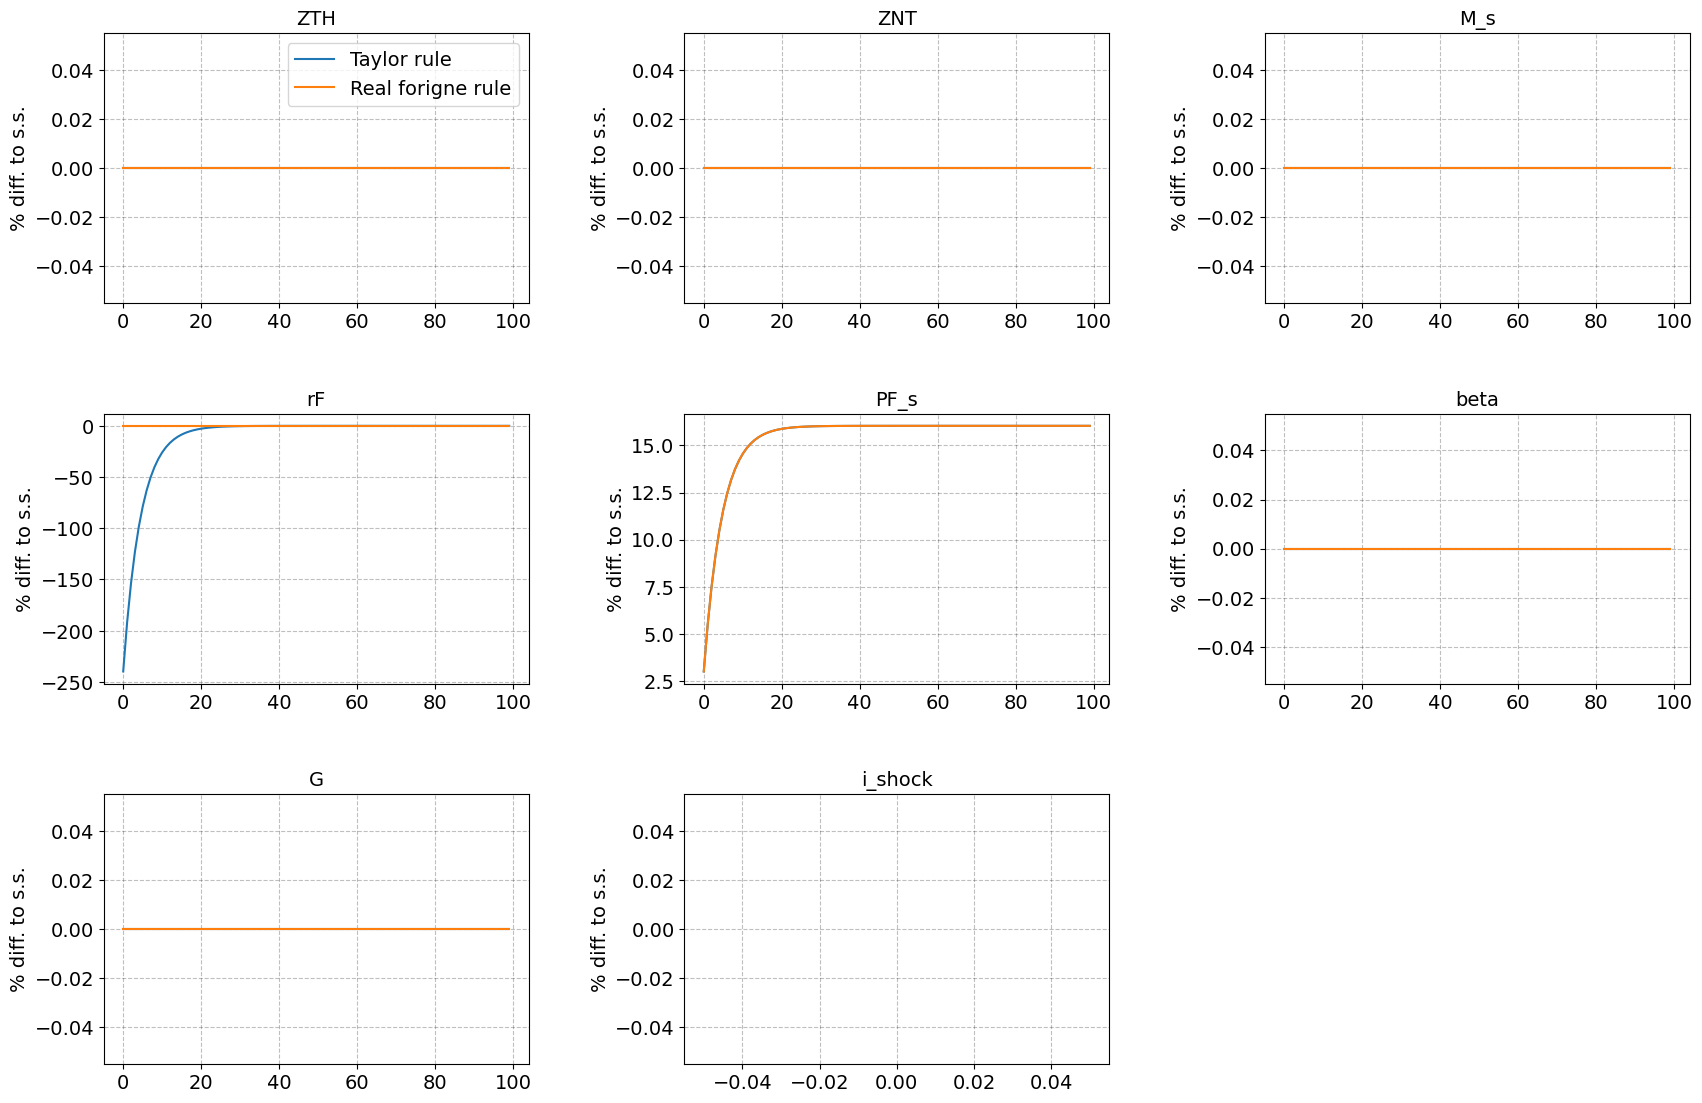


### varnames ###


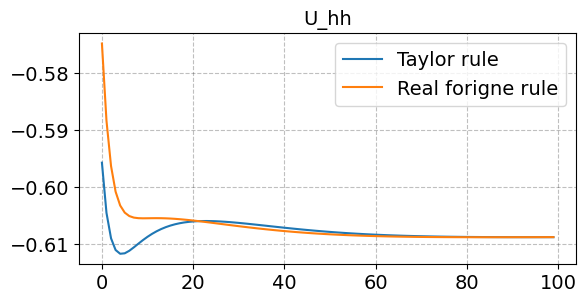


### tagets ###


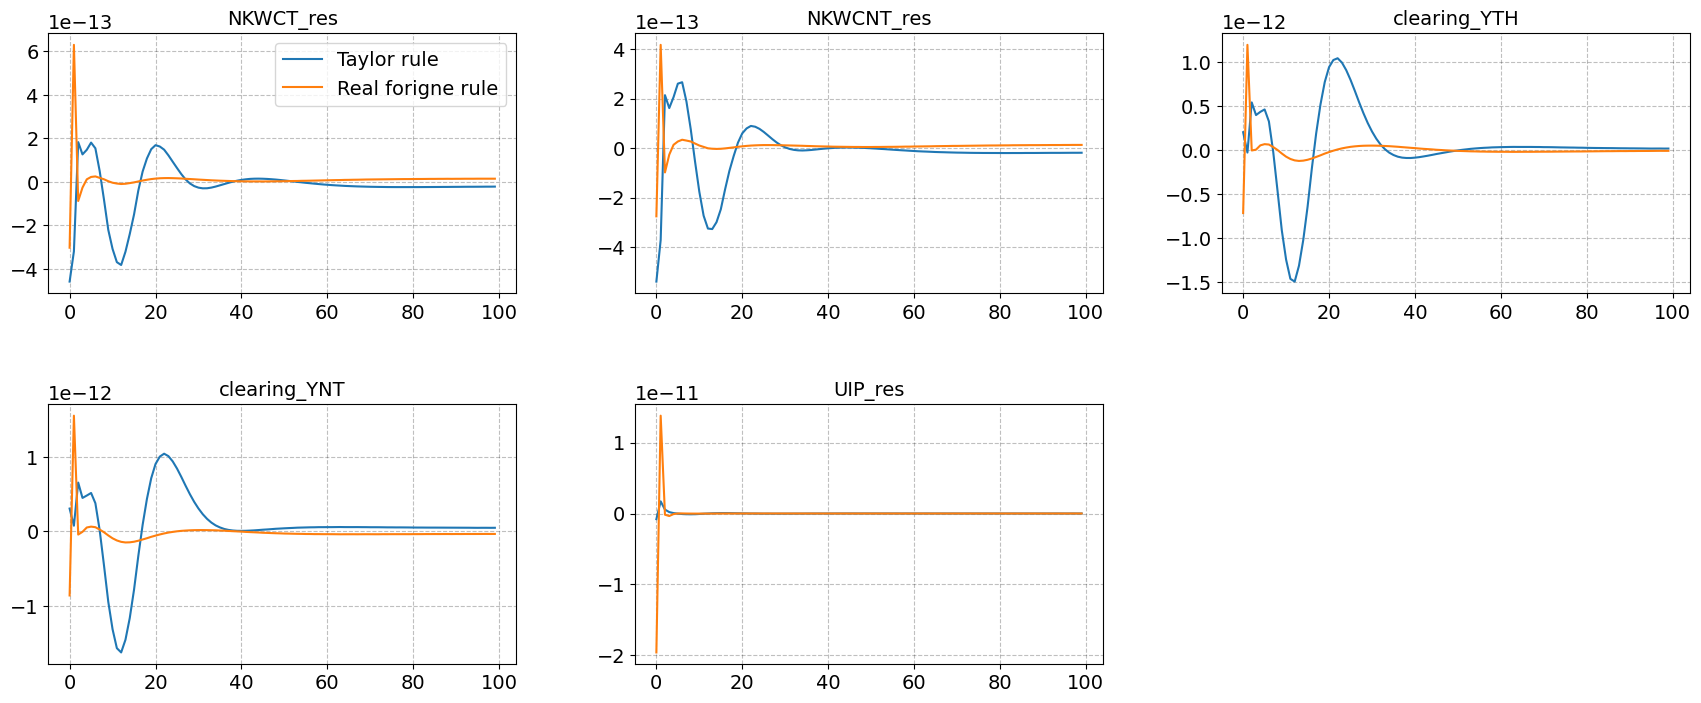

In [120]:
model_PF_s_real.compare_IRFs(models=[model_PF_s_taylor,model_PF_s_real], labels=['Taylor rule', 'Real forigne rule'], varnames=['U_hh'], lvl_value=lvl_path, T_max=100, ncols=3)
# model_PF_s_real.compare_IRFs(models=[model_PF_s_taylor,model_PF_s_real], labels=['Taylor rule', 'Real forigne rule'], varnames=model.varlist, lvl_value=lvl_path, T_max=100, ncols=3)

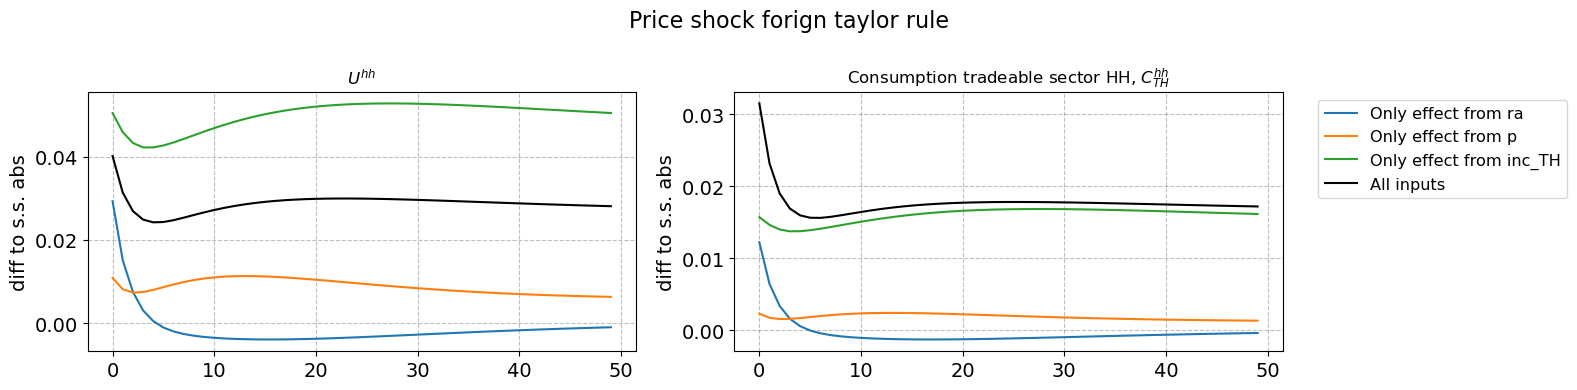

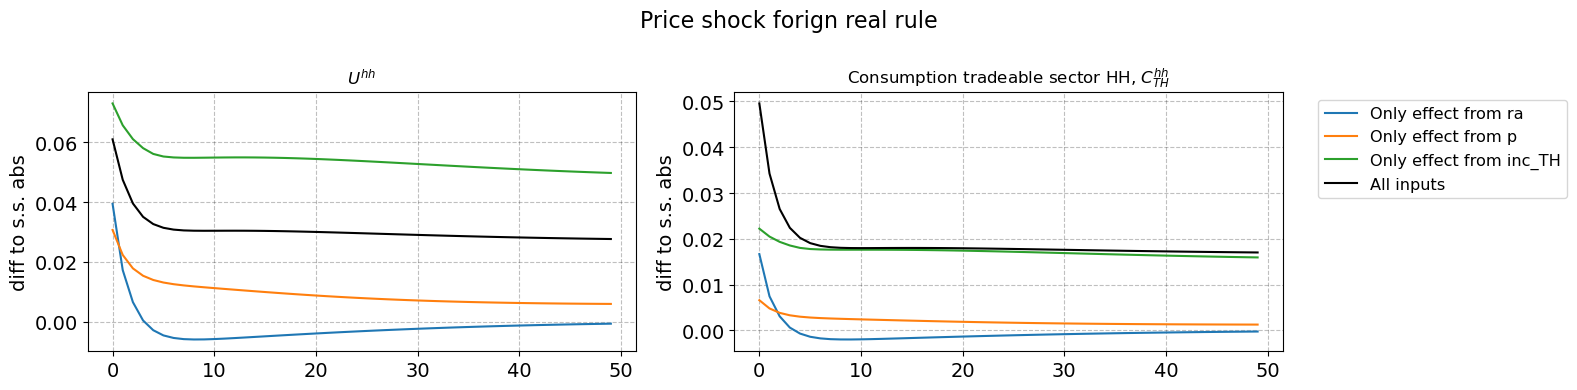

In [119]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']
models = {'model_PF_s_taylor': model_PF_s_taylor}

models = {'model_PF_s_taylor': model_PF_s_taylor, 'model_PF_s_real': model_PF_s_real}
inputs_list = [['ra'], ['p'], ['inc_TH', 'inc_NT' ], 'all']

model_titles = {
    'fixed': 'Price shock, fixed E', 
    'model_PF_s_taylor': 'Price shock forign taylor rule', 
    'model_PF_s_real': 'Price shock forign real rule',
}

for model_name, model in models.items():

    T_max = 50

    fig, (ax_C_NT, ax_C_TH) = plt.subplots(1, 2, figsize=(16, 4), dpi=100)
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)

    ax_C_NT.set_title('$U^{hh}$', fontsize=12)
    ax_C_TH.set_title('Consumption tradeable sector HH, $C_{TH}^{hh}$', fontsize=12)

    i_color = 0

    # for use_inputs in [[x] for x in model.inputs_hh]:
    for use_inputs in inputs_list:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black' 
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        ax_C_NT.plot((path_alt.U_hh[:T_max] - model.ss.U_hh ) , ls=ls, color=color, label=label)
        ax_C_TH.plot((path_alt.CNT_hh[:T_max] - model.ss.CNT_hh ) , ls=ls, color=color, label=label)

    for ax in [ax_C_NT, ax_C_TH]:
        ax.set_ylabel('diff to s.s. abs')
        lgd = ax_C_TH.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
  

In [115]:
model_mu = model.copy('mu high')
model_mu.par.muw = model.par.muw + 0.1

model_mu.find_ss(do_print=False)
model_mu.compute_jacs()


Share of domestic workers in tradable sector = 0.50


In [116]:
model_mu.find_transition_path(shock_PF_s_taylor, do_end_check=False)

### shocks ###


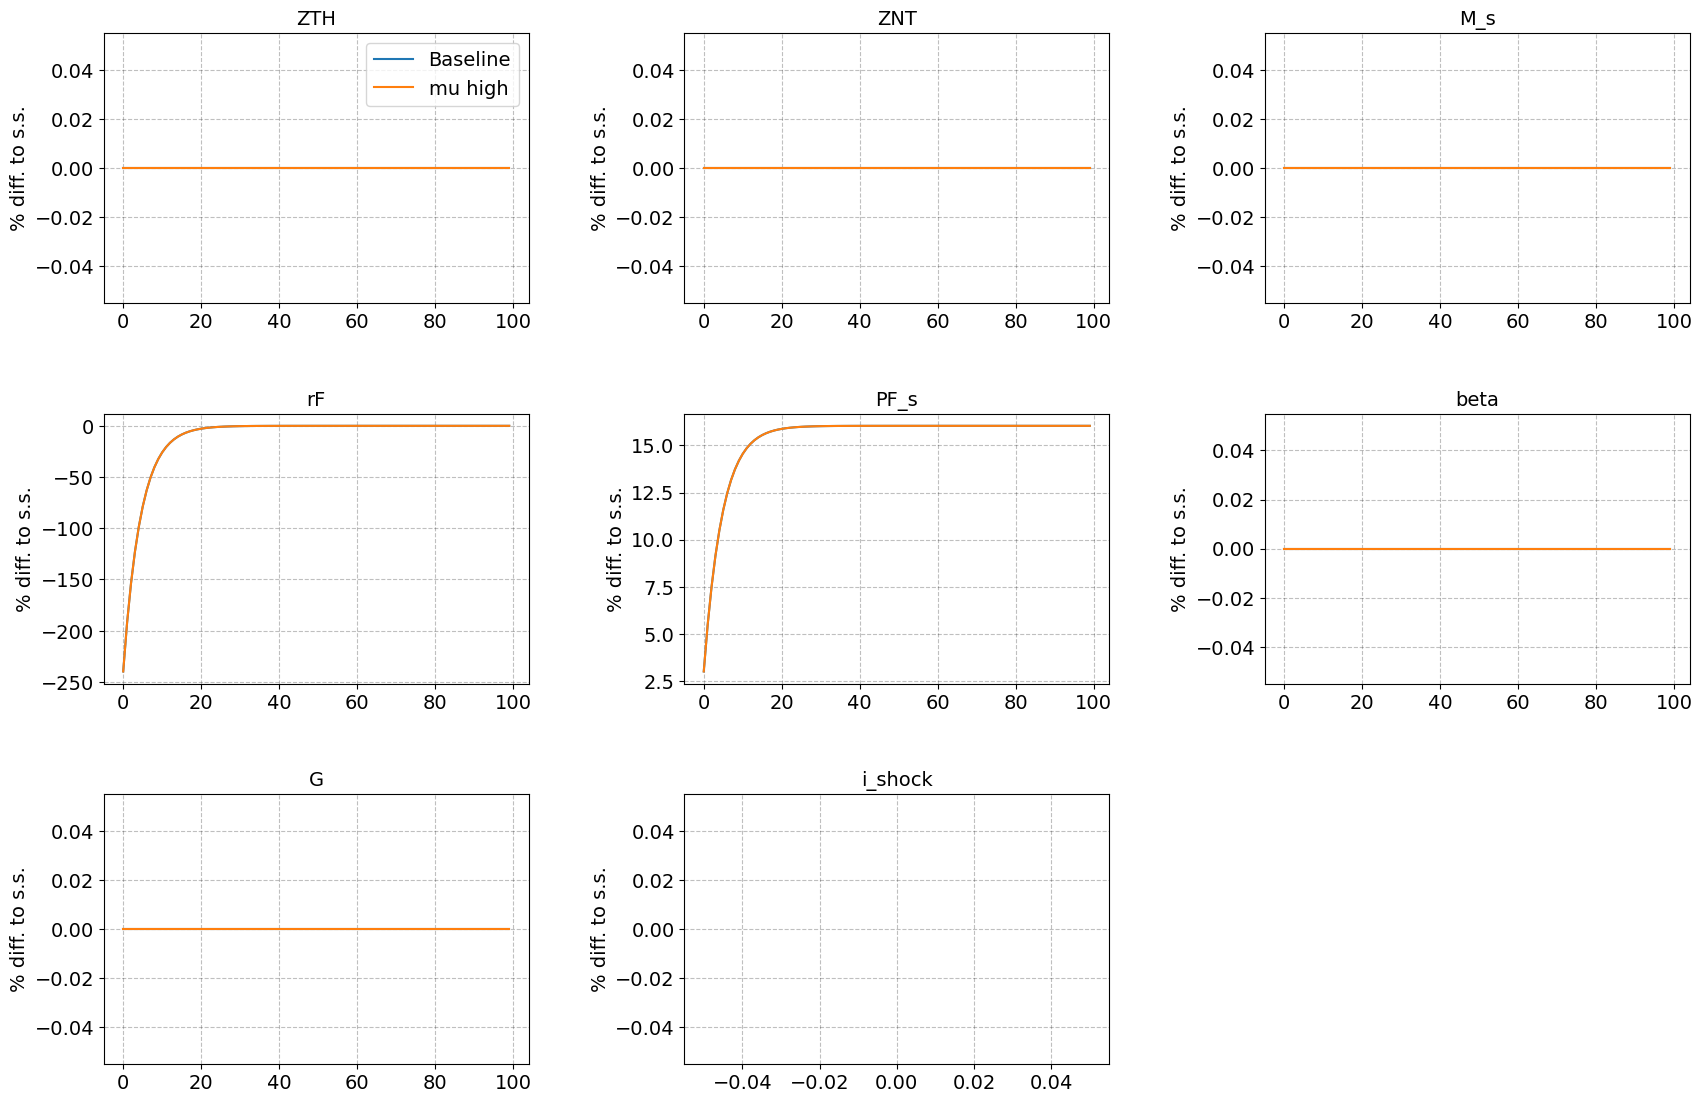


### varnames ###


/Users/emmagundersen/GEModelTools/GEModelTools/figures.py:107: RuntimeWarning: divide by zero encountered in divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)


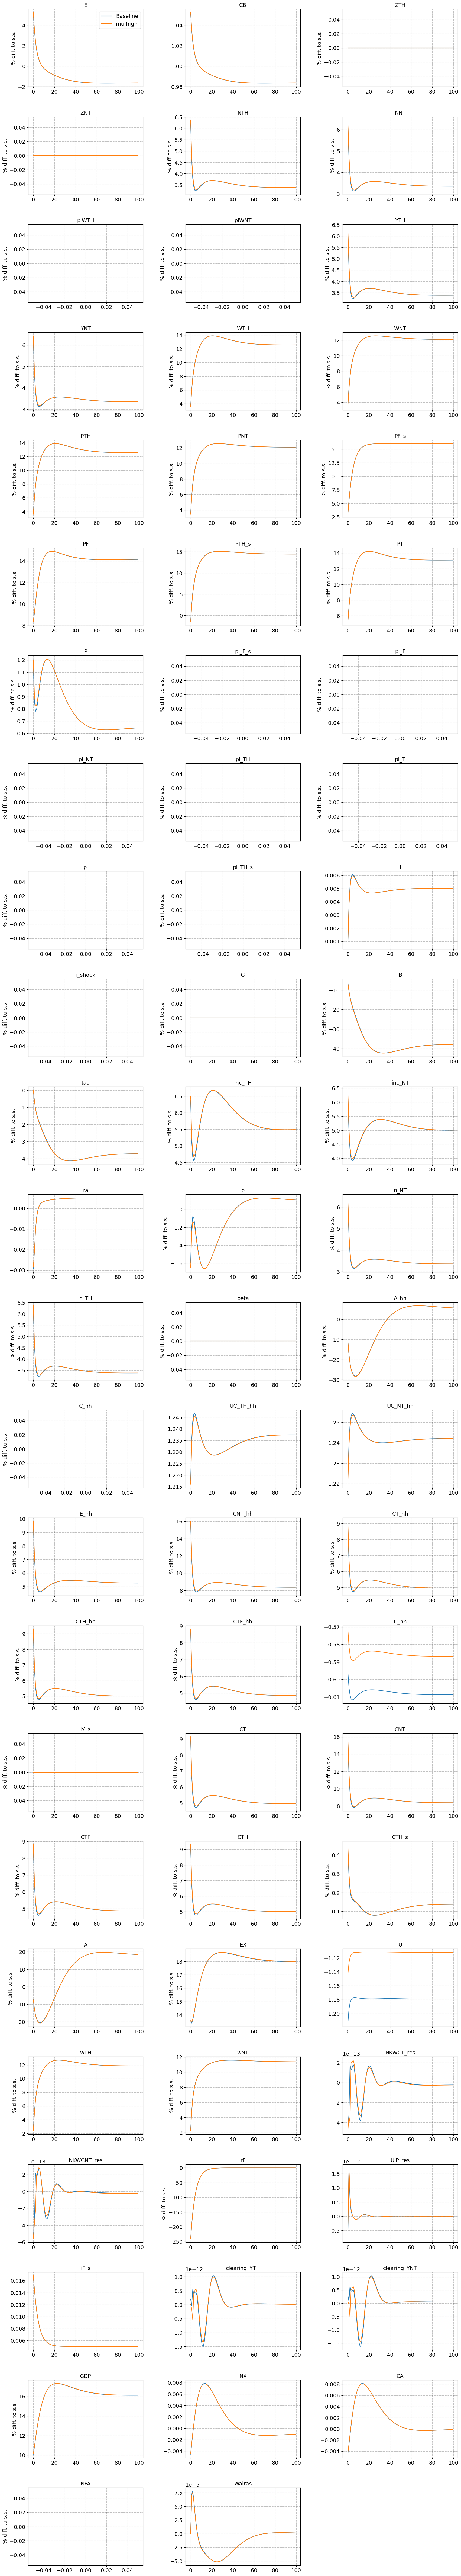


### tagets ###


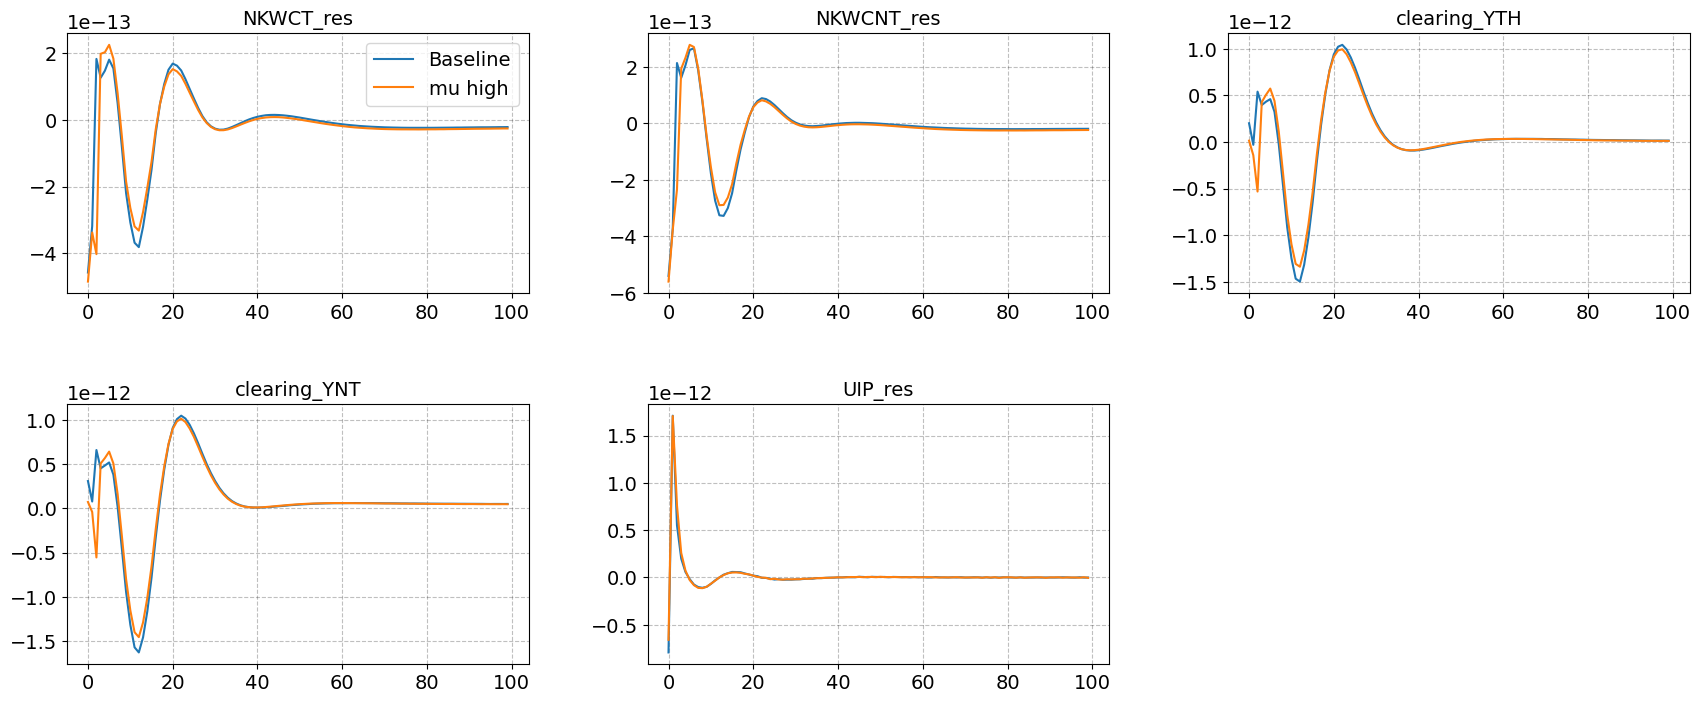

In [117]:
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_mu], labels=['Baseline', 'mu high'], varnames=model.varlist, lvl_value=lvl_path, T_max=100, ncols=3)